In [1]:
!pip install pyforest


In [1]:
from pyforest import *
lazy_imports()

['from sklearn.linear_model import RidgeCV',
 'import os',
 'import glob',
 'import fastai',
 'import sklearn',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import textblob',
 'import spacy',
 'import bokeh',
 'from sklearn.cluster import KMeans',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import statsmodels.api as sm',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.linear_model import Lasso',
 'from sklearn.linear_model import LassoCV',
 'from PIL import Image',
 'import tensorflow as tf',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from pathlib import Path',
 'import matplotlib.pyplot as plt',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.model_selection import cross_val_score',
 'import imutils',
 'from sklearn.linear_model import LogisticRegression',
 'from scipy import stats',
 'from sklearn.manifold import TSNE',
 'import seaborn as sns',
 

In [2]:
dataset = pd.read_csv('dataset.csv')

<IPython.core.display.Javascript object>

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [4]:
scaling = MinMaxScaler(feature_range=(0,1))

<IPython.core.display.Javascript object>

In [5]:
X = scaling.fit_transform(X)

Building and Training SOM

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom( x=10,y=10, input_len=15,sigma=1,learning_rate=0.5)

In [8]:
#initialize random weigth before training
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

Visualizing

In [9]:
from pylab import bone, pcolor, colorbar, plot, show

In [10]:
bone()


<Figure size 432x288 with 0 Axes>

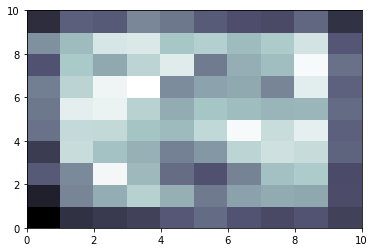

In [11]:
#som mapping
pcolor(som.distance_map().T)

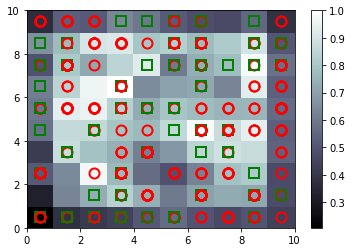

In [12]:
pcolor(som.distance_map().T)
colorbar()
markers= ['o','s']
colors = ['r', 'g']
for i,j in enumerate(X):
  w=som.winner(j)
  plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
       markeredgecolor=colors[y[i]],markerfacecolor='None',
       markersize=10,markeredgewidth=2)
  

show()

In [ ]:
mappings = som.win_map(X)
frauds =  np.concatenate((mappings[(3,6)], mappings[(8,7)],mappings[(6,4)]), axis = 0)
frauds = scaling.inverse_transform(frauds)

In [14]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15783859
15763194
15740411
15790689
15621546
15585855
15661412
15571284
15591360
15570947
15649183
15641715
15589881
15592326
15622507
15598266
15602456
15642098
15580579
15568819
15731586
15705918
15783883
15756538
15675926
15769548
15673907
15752578
15666096
15805261
